## COVID-19 US Community Mobility Trends Analysis

In this project, we will explore how the COVID-19 pandemic has impacted mobility trends in the United States from 2020 to 2022, including changes in the number of visits to various types of locations (e.g. retail and recreation, grocery stores and pharmacies, parks, transit stations, workplaces, and residential areas).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
US_2020 = pd.read_csv('data/2020_US_Region_Mobility_Report.csv', low_memory=False)
US_2021 = pd.read_csv('data/2021_US_Region_Mobility_Report.csv', low_memory=False)
US_2022 = pd.read_csv('data/2022_US_Region_Mobility_Report.csv', low_memory=False)

Concatenate three dataframes 

In [3]:
US_Mobility = pd.concat([US_2020, US_2021, US_2022], ignore_index=True)

US_Mobility.sample(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
89718,US,United States,Florida,Escambia County,NaN,NaN,12033.0,ChIJseTBcm1lkIgRNUELOhQhLts,2020-12-01,-9.0,1.0,-24.0,-32.0,-23.0,6.0
868338,US,United States,Arkansas,Yell County,NaN,NaN,5149.0,ChIJKWW2vMtHzIcRvqHbsk-N0uo,2021-06-16,NaN,NaN,NaN,NaN,-28.0,NaN
949099,US,United States,Georgia,DeKalb County,NaN,NaN,13089.0,ChIJW8Aub0YI9YgRR06nEDs3MzE,2021-04-30,-18.0,-6.0,61.0,-36.0,-37.0,7.0
41972,US,United States,Arkansas,Ouachita County,NaN,NaN,5103.0,ChIJK2Xfwq9cMoYRyi1XGpZpSa0,2020-11-24,NaN,NaN,NaN,NaN,-27.0,5.0
2502357,US,United States,Wisconsin,Shawano County,NaN,NaN,55115.0,ChIJ_WPnaD71AYgRySeagRoUn_4,2022-04-29,8.0,16.0,NaN,NaN,-8.0,3.0


In [4]:
US_Mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511994 entries, 0 to 2511993
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          float64
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

rename columns and select relevant columns

In [5]:
# rename columns
US_Mobility = US_Mobility.rename(columns = {'sub_region_1': 'state',
                                            'sub_region_2': 'county',
                                            'retail_and_recreation_percent_change_from_baseline': 'retail_and_recreation',
                                            'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
                                            'parks_percent_change_from_baseline':'parks',
                                            'transit_stations_percent_change_from_baseline':'transit_stations',
                                            'workplaces_percent_change_from_baseline':'workplaces',
                                            'residential_percent_change_from_baseline':'residential'} )

In [6]:
columns = ['state',
           'county',
           'date',
           'retail_and_recreation', 
           'grocery_and_pharmacy', 
           'parks',
           'transit_stations', 
           'workplaces', 
           'residential']
US_Mobility = US_Mobility[columns]

US_Mobility.sample(5)

,state,county,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
722192,Vermont,Washington County,2020-10-01,-8.0,25.0,NaN,NaN,-29.0,6.0
2112495,Mississippi,Jefferson Davis County,2022-01-24,NaN,NaN,NaN,NaN,-6.0,NaN
641410,Tennessee,McNairy County,2020-03-12,14.0,32.0,NaN,NaN,-3.0,NaN
870958,California,Contra Costa County,2021-08-20,-18.0,-6.0,-11.0,-44.0,-37.0,9.0
1353090,New Mexico,Hidalgo County,2021-10-06,NaN,NaN,NaN,12.0,NaN,NaN


In [7]:
US_Mobility['year_month'] = US_Mobility['date'].str.rsplit('-', n=1, expand=True).drop(columns=1, axis=1)
US_Mobility['year_month']

0          2020-02
1          2020-02
2          2020-02
3          2020-02
4          2020-02
            ...   
2511989    2022-10
2511990    2022-10
2511991    2022-10
2511992    2022-10
2511993    2022-10
Name: year_month, Length: 2511994, dtype: object

### Group data by year and month

In [15]:
groupby_data = US_Mobility.groupby('year_month').mean(numeric_only=True).reset_index()
groupby_data.head()

,year_month,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,2020-02,6.145196,2.103233,14.454504,4.253531,-0.086161,0.232813
1,2020-03,-10.379869,5.360028,14.432377,-8.988731,-14.747643,6.571577
2,2020-04,-34.688613,-9.515706,1.069038,-31.144862,-37.378917,16.550969
3,2020-05,-15.271136,2.834255,38.376006,-16.831389,-28.982362,11.671517
4,2020-06,-3.024183,7.141806,68.486314,-5.046891,-22.866399,7.511058


### Retail & recreation

Explore the mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.

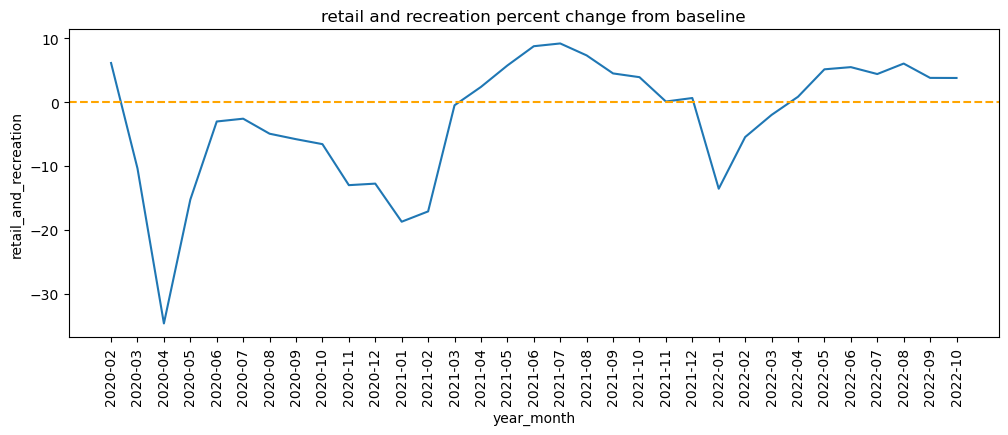

In [25]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=groupby_data, x='year_month', y='retail_and_recreation')
ax.axhline(y=0, linestyle='dashed', color='orange')
plt.xticks(rotation=90)
plt.title('retail and recreation percent change from baseline')
plt.savefig('figures/retail_and_recreation_percent_change_from_baseline.png');

### Parks
Explore the mobility trends for places like local parks, national parks, public beaches, marinas, dog parks, plazas, and public gardens.

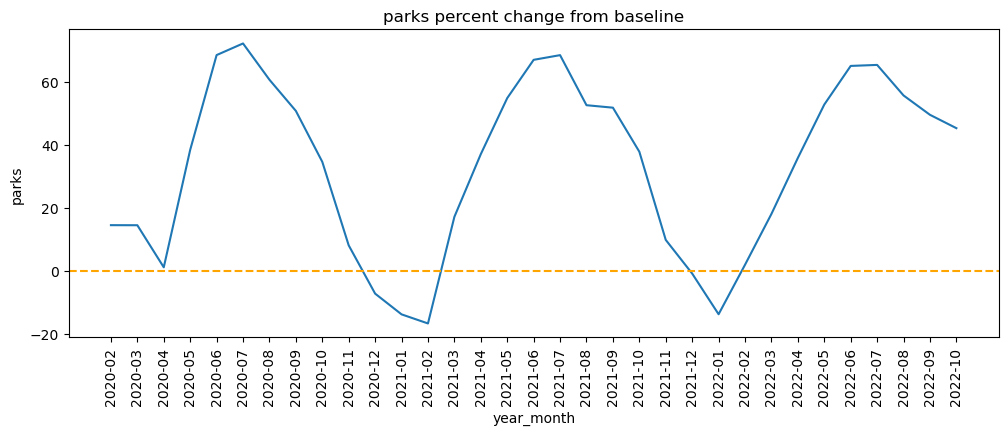

In [26]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=groupby_data, x='year_month', y='parks')
ax.axhline(y=0, linestyle='dashed', color='orange')
plt.xticks(rotation=90)
plt.title('parks percent change from baseline')
plt.savefig('figures/parks_percent_change_from_baseline.png');

### Transit stations
Explore the mobility trends for places like public transport hubs such as subway, bus, and train stations.

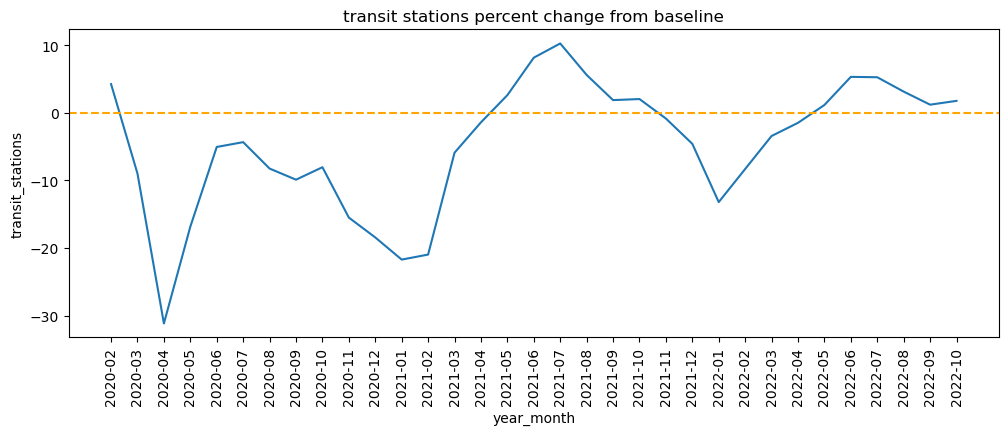

In [27]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=groupby_data, x='year_month', y='transit_stations')
ax.axhline(y=0, linestyle='dashed', color='orange')
plt.xticks(rotation=90)
plt.title('transit stations percent change from baseline')
plt.savefig('figures/transit_stations_percent_change_from_baseline.png');

### Grocery & pharmacy

Explore the mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.

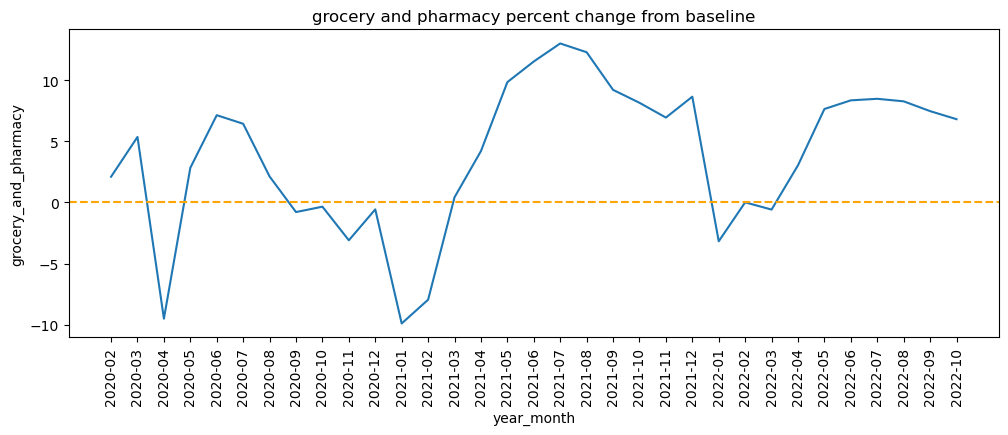

In [28]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=groupby_data, x='year_month', y='grocery_and_pharmacy')
ax.axhline(y=0, linestyle='dashed', color='orange')
plt.xticks(rotation=90)
plt.title('grocery and pharmacy percent change from baseline')
plt.savefig('figures/grocery_and_pharmacy_percent_change_from_baseline.png');

### Residential
Explore the mobility trends for places of residence.

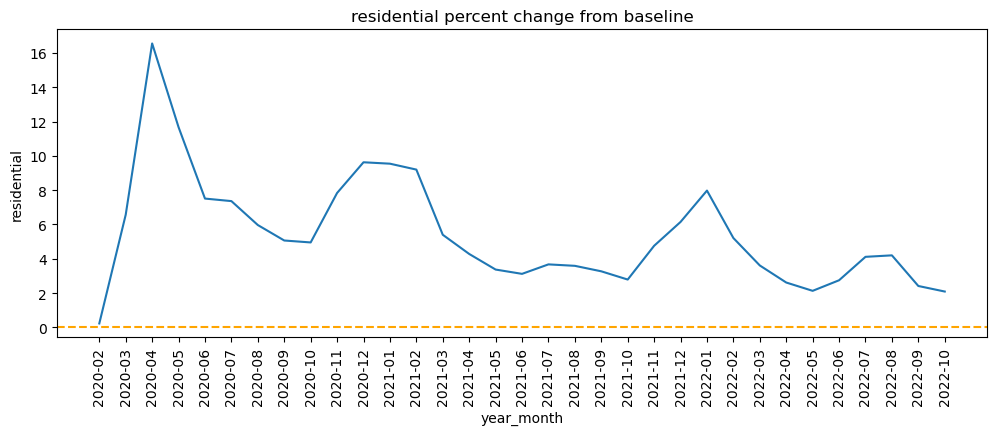

In [29]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=groupby_data, x='year_month', y='residential')
ax.axhline(y=0, linestyle='dashed', color='orange')
plt.xticks(rotation=90)
plt.title('residential percent change from baseline')
plt.savefig('figures/residential_percent_change_from_baseline.png');

### Workplaces
Explore the mobility trends for places of work.